In [2]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

- Sequential 당연 필요한 거고
- Dense = fully connected

예측 잘하려면 activation을 어떻게 잘 쓰느냐에 따라 또 갈림

### 데이터 받아오고
- x는 왼쪽에(영향 미치는 요소 13개) 
- y는 오른쪽에(보스턴 하우스 price값)

- variable 네개 받아 온 것

In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

### 데이터 어떻게 생겼나 확인

In [4]:
x_train.shape
y_train.shape

(404,)

In [6]:
x_train.shape

(404, 13)

In [7]:
x_test.shape
y_test.shape

(102,)

In [14]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

보스톤 집값 예측 능력 (regression의 역할 = 예측하기)

<입력> 값은 총 13개(요소) / <출력> 값은 1개
- crim : 범죄율 -> 당연 집값 떨
- zn : 총 땅 중에서 주거지 비율 (반대-상업지 등)
- indus : 도매의 비율
- chas : 찰스강과의 거리 (dummy variable = categorical 한 것. 숫자랑 관련 없는 것이지만 숫자로 표현하는 정보)
- nox : 질산 포화도 정도
- rm : 집에 방의 개수
- age : 1940년 이전에 지어진 집의 비율
- dis : 보스톤 상업지구와의 거리
- rad : 고속도로와의 접근성
- tax : 집값에 따른 세금내는 비율
- ptratio : 학생-교사 비율
- black : black people 수
- lstat : 하위계층이 얼마나 있는지 정도(퍼센티지)

이 관련 데이터들을 이미 모아놨고

이걸 엑셀로 만들면 총 몇개의 액셀 파일 컬럼이 있을 까 - 총 14개 (x 13개, y 1개)

### 플로팅 개별로 해보는 것

- 404개의 벡터 중에서 첫번째 것만 보고 싶을 때 - [:,0] ∵index는 첫번째가 0부터 시작 / 13번째는 - [:,13]

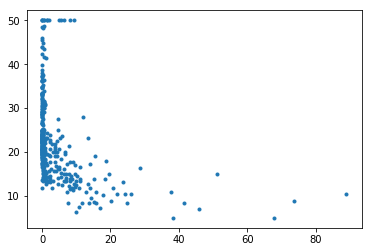

In [8]:
plt.plot(x_train[:,0], y_train, '.')

- y값은 집값 ex) 50천불?=5만불 → 대충 퍼센트로 표시된거라고 파악할 수 있

- 확인할 수 있는 것 : x,y 관계가 linear한 관계는 아니구나

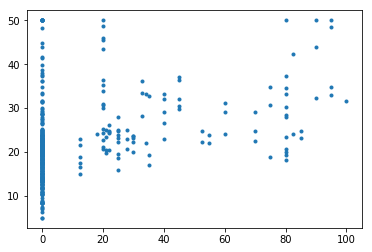

In [11]:
plt.plot(x_train[:,1], y_train, '.')

- 두번째 벡터 확인 → residential 없으면 떨어지고 등 (정의 확인하기)

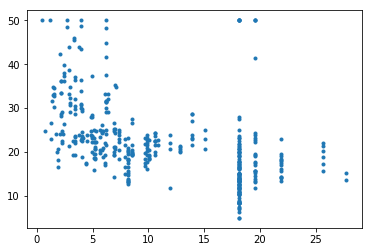

In [12]:
plt.plot(x_train[:,2], y_train, '.')

- non-retail = wholesale관련

### 모델 만들기 (본격적 neural network만드는 것) - 가장 중요한 식들

In [6]:
model = Sequential()
model.add(Dense(1, input_shape=[13]))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(1, input_shape=[13])) → 입력이 13개 출력이 1인 그림을 생각할 수 있

model.compile(optimizer='rmsprop', loss='mse') → regression 일 경우 이렇게 적어야 함

summary = 결과로 보기 
→ parameter(=weight) 가 왜 14개? 화살표를 만들 때 맨마지막에 1 붙는거(=b값) 그것도 결국 훈련 대상이므로 

여기서 hidden layer 사이에 넣는 방법
- 출력 부분인 dense 뒤 숫자를 1이 아니라 10 바꿔주고 밑에다 model.add(Dense(1)

ex) model.add(Dense(10, input_shape=[13]))
    model.add(Dense(1)
    
ex) model.add(Dense(10, input_shape=[13])) 
    model.add(Dense(20, input_shape=[13]))
    model.add(Dense(1)                       -> hidden layer 두개 있는 경우

- 이렇게 층 늘려서 해봐도 loss값 변화 크게 없(30→28)  
- ∵linear 한 값들은 히든 넣든 별 큰 차이 없고 non-linear한 거 넣을 때 유의미한 변화

#### Hidden Layer 중간에 넣어준 응용

In [8]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

# hidden layer에 non-linearity 추가
# 값 25까지 떨어지는 거 확인 가능

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


중요!!!!!
- parameter 수 = 화살표 개수

<결과값> 
- 맨처음 parameter 수 = 140 
- ∵ 입력 14(입력값13+b값 하나=인터셉트 부분이라고 부름) * 히든래이어 10 이므로 = 첫번째 화살표 세트


- 두번째 parameter 수 = 11 (중간 히든 래이어에서 10+ b값(=1) 하나 더해준 값 * 1개 마지막 노드) = 두번째 화살표 세트


- 가운데 히든 레이어에 'relu' activation해준 거고 맨 마지막에 아무것도 안 붙여주는거는(linear 붙여주기)

In [9]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


사실 저 none 부분에 1 벡터가 들어가 있다고 생각 ∴ 1 * 13
- but) 왜 1안쓰고 none이라고 쓴건지?

<구조 파악>
- (1 * 13) (13 * 10) (10 * 1) = 1 * 1

1 * 13 인 이유 는 여기서 보스턴 하우징 분석 할 때 한 집만 하나의 케이스만 입력하는 것이기에 따라서
neural net 에 여러개 한꺼번에 넣으려면

(100 * 1) 로 맨처음에 넣어줘도 괜춘 = 맨 마지막 결과 100 * 1

따라서 none 이라고 써주는 것은 거기에 어떤 개수든 들어갈 수 있고 데이터의 개수에 따라 변화될 수 있는 값이라서 none이라고 표현한 것 (정해지지 않은 값)

### None = batch_size?

- 맨 앞에 none에 들어가는 값을 batch size라고 부름
- 즉 입력하는 분석하는 데이터의 수 ex) 1개의 house, 100개의 house

In [ ]:
model.fit(x_train, y_train, epochs=1000)

fit은 실제 데이터 가지고 weight matrix를 구하는 함수

404개의 데이터를 천번 돌리는 것

왜 404개냐면 x_train.shape 했을 때 (404,13)으로 뜸

epochs 뒤에 아무것도 안정해주면 디폴트 값이 34

뒤에 batch_size = 1 등등 정해줄 수 있

In [ ]:
model.fit(x_train, y_train, epochs=1000, batch_size=1)

1로하면 계산을 하나하나 순서대로 하고 (화살표=== 하나하나씩 움직이는게 보임. loss 29 보다는 떨어짐)
404로 하면 계산을 시간이 걸려도 한꺼번에 함
(화살표 움직임이 안보임. 1로 했을 때보다 계산 빠름 그치만 loss는 29에서 떨어지지 않음)

model.fit(x_train, y_train, epochs=1000, batch_size=404)

train 값 말고 test 값으로도 확인하기

In [17]:
model.fit(x_train, y_train, epochs=1)

Instructions for updating:
Use tf.cast instead.
404/404 [==============================] - 0s 1ms/sample - loss: 71736.5908


In [18]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
404/404 [==============================] - 0s 77us/sample - loss: 64232.7281
Epoch 2/10
404/404 [==============================] - 0s 77us/sample - loss: 58379.6248
Epoch 3/10
404/404 [==============================] - 0s 77us/sample - loss: 53000.1682
Epoch 4/10
404/404 [==============================] - 0s 39us/sample - loss: 47926.1139
Epoch 5/10
404/404 [==============================] - 0s 77us/sample - loss: 43133.4585
Epoch 6/10
404/404 [==============================] - 0s 77us/sample - loss: 38640.1900
Epoch 7/10
404/404 [==============================] - 0s 39us/sample - loss: 34395.5976
Epoch 8/10
404/404 [==============================] - 0s 77us/sample - loss: 30405.6461
Epoch 9/10
404/404 [==============================] - 0s 116us/sample - loss: 26703.4974
Epoch 10/10
404/404 [==============================] - 0s 116us/sample - loss: 23269.9775


맨 뒤 숫자값(loss값) epoch 늘려서 훈련할 수록 작아지는거 확인할 수 있

loss값 줄이는 게 핵심

In [ ]:
model.evaluate(x_test, y_test)

결과값

       102/102 [==============================] - 0s 839us/sample - loss: 31.2181

Out[6] : 31.218123192880668

### 결국 플로팅 한꺼번에 하는 거

- subplot = 구획 나구기 
- i+1 쁠 1해주는 이유 : index는 0~12까지 돌기 때문에

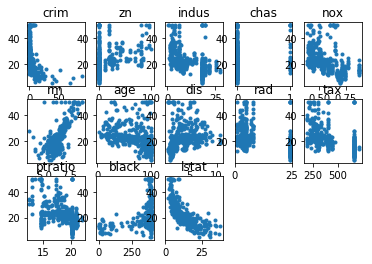

In [15]:
boston_housing = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']

for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

### make the highest price!

In [ ]:
model.predict(np.array([0, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 300, 0]).reshape(1,13))

array([[260.83545]], dtype=float32)   - 결과값

가상의 데이터 factor를 만들어서 제일 집값 높이거나 낮추거나 해보는 작업

어떤 x값이 들어가면 집값이 낮게 나오고 어떤 조합은 높게 나오는지

- x값 범위가 0부터 100인데 crim 에서 highest집값은 0가까울수록 높은
- 두번째 zn은 패턴이 대충 봤을 때 x값 커질수록 집값 올라가는 패턴 그래서 90 넣음
- 나머지 factor들도 마찬가지로 적용

한가지 trick은 숫자가 13개 들어가있는 list를 array로 바꿔주기 했는데 왜 뒤에 reshape을 했는지?
- 반드시 reshape을 (1,13)으로 해줘야 하는데 그 이유가 안하면 에러남
- 그 이유는 위에서 model.input_shape이 (none, 13)으로 이미 정해놨기 때문에
- 따라서 reshape 필수로 넣어줘야 함

더 다양한 값 넣어서 집값 조절해보기

### make the lowest price!

In [ ]:
model.predict(np.array([100, 10, 25, 0, 1, 
                        50, 100, 0, 25, 700, 
                        23, 0, 30]).reshape(1,13))

array([[41.14243]], dtype=float32) - 결과값